# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304
## SECTION: Regression
### VIDEO: Simple regression
#### TEACHER: Mike X Cohen, sincxpress.com

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

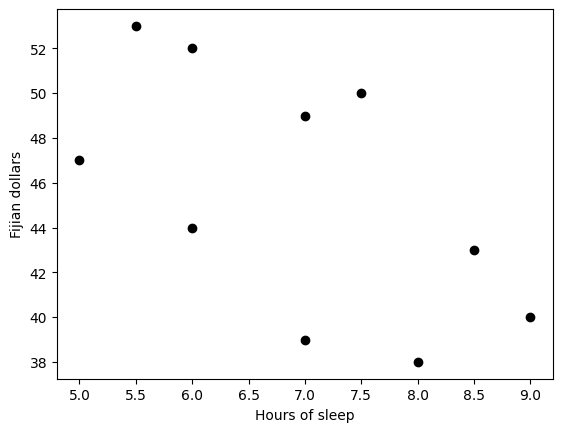

In [8]:
## example: effects of sleep on food spending

sleepHours = [5, 5.5, 6, 6, 7, 7, 7.5, 8, 8.5, 9]
dollars = [47, 53, 52, 44, 39, 49, 50, 38, 43, 40]

# start by showing the data
plt.plot(sleepHours,dollars,'ko',markerfacecolor='k')
plt.xlabel('Hours of sleep')
plt.ylabel('Fijian dollars')
plt.show()

In [9]:
## "manual" regression via least-squares fitting

# create the design matrix
desmat = np.vstack((np.ones(10), sleepHours)).T
print(desmat)

# compute the beta parameters (regression coefficients)
beta = np.linalg.lstsq(desmat,dollars,rcond=None)[0]
print(beta)

# predicted data values
yHat = desmat@beta

[[1.  5. ]
 [1.  5.5]
 [1.  6. ]
 [1.  6. ]
 [1.  7. ]
 [1.  7. ]
 [1.  7.5]
 [1.  8. ]
 [1.  8.5]
 [1.  9. ]]
[62.84737679 -2.49602544]


In [10]:
desmat.shape

(10, 2)

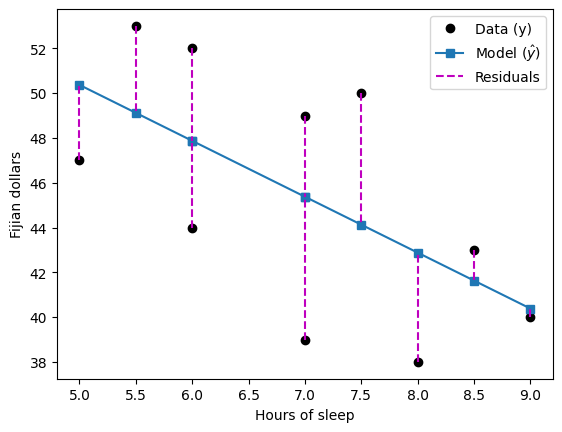

In [11]:
## show the predicted results on top of the "real" data

# show previous data
plt.plot(sleepHours,dollars,'ko',markerfacecolor='k')

# predicted results
plt.plot(sleepHours,yHat,'s-')

# show the residuals
for i in range(10):
    plt.plot([sleepHours[i],sleepHours[i]],[dollars[i], yHat[i]],'m--')


plt.legend(('Data (y)','Model ($\^{y}$)','Residuals'))

plt.xlabel('Hours of sleep')
plt.ylabel('Fijian dollars')
plt.show()

In [12]:
## now with scipy

slope,intercept,r,p,std_err = stats.linregress(sleepHours,dollars)
print(intercept,slope)
print(beta)

62.84737678855326 -2.4960254372019075
[62.84737679 -2.49602544]


## Evaluating Model Statistical Significance with F

#### Sum of squares of the residiuals:

$ SS_{\epsilon} = E(y_i - \hat{y})^2$


#### Sum of sqaures of the Model:

$ SS_{\text{Model}} = E(\hat{y}_i - \overline{y} )^2 $

#### F Ratio:

$$
% k is total number of parameters in the model including intercept
F (\mathcal{k} - 1, N - k) = \frac{SS_{\text{Model}} / (k - 1)}{SS_{\epsilon} / (N - k)}
$$